# Analysis of Dementia:

## Subtitle WIP

In [10]:
# Import necessary libraries
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt 

In [2]:
# Load and preview data
dementia = pd.read_csv("/home/wells/code/dementia/OPTIMAL_combined_3studies_6feb2020.csv")
dementia.head()

,ID,age,gender,dementia,dementia_all,educationyears,EF,PS,Global,diabetes,...,hypercholesterolemia,lacunes_num,fazekas_cat,study,study1,SVD Simple Score,SVD Amended Score,Fazekas,lac_count,CMB_count
0,1,52.67,male,0.0,0,11.0,-2.403333,-1.290000,-1.287000,0,...,Yes,more-than-zero,2 to 3,scans,scans,3.0,7.0,3,>5,>=1
1,10,64.58,male,0.0,0,10.0,1.280000,0.360000,0.744000,0,...,Yes,more-than-zero,0 to 1,scans,scans,2.0,3.0,1,1 to 2,>=1
2,100,74.92,male,0.0,0,8.0,-1.440000,-1.520000,-0.922000,0,...,Yes,more-than-zero,0 to 1,scans,scans,1.0,2.0,1,1 to 2,0
3,101,74.83,male,1.0,1,9.0,NaN,-2.136271,-1.301102,0,...,Yes,more-than-zero,2 to 3,scans,scans,2.0,4.0,2,3 to 5,0
4,102,79.25,male,0.0,0,10.0,-0.920000,-1.493333,-0.924000,0,...,Yes,more-than-zero,2 to 3,scans,scans,2.0,3.0,2,1 to 2,0


In [3]:
# Info on dataset and types
dementia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1842 entries, 0 to 1841
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    1842 non-null   int64  
 1   age                   1842 non-null   float64
 2   gender                1842 non-null   object 
 3   dementia              1808 non-null   float64
 4   dementia_all          1842 non-null   int64  
 5   educationyears        1842 non-null   float64
 6   EF                    1634 non-null   float64
 7   PS                    1574 non-null   float64
 8   Global                1534 non-null   float64
 9   diabetes              1842 non-null   int64  
 10  smoking               1831 non-null   object 
 11  hypertension          1842 non-null   object 
 12  hypercholesterolemia  1842 non-null   object 
 13  lacunes_num           1842 non-null   object 
 14  fazekas_cat           1842 non-null   object 
 15  study                

Percentage null:
 ID                       0.000000
age                      0.000000
gender                   0.000000
dementia                 1.845820
dementia_all             0.000000
educationyears           0.000000
EF                      11.292074
PS                      14.549403
Global                  16.720955
diabetes                 0.000000
smoking                  0.597177
hypertension             0.000000
hypercholesterolemia     0.000000
lacunes_num              0.000000
fazekas_cat              0.000000
study                    0.000000
study1                   0.000000
SVD Simple Score        36.753529
SVD Amended Score       36.753529
Fazekas                  0.000000
lac_count                0.000000
CMB_count                0.000000
dtype: float64


<Axes: >

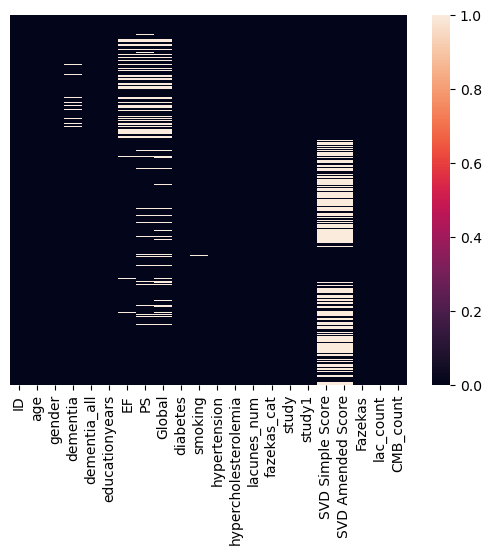

In [9]:
# Percentage of null values
null_data = dementia.isnull().sum() * 100 / dementia.shape[0]
print("Percentage null:\n", null_data)
sns.heatmap(dementia.isnull(), yticklabels=False)

In [5]:
# Calculate means for variables of interest
age_dementia_mean = round(dementia['age'].mean(),1)
diagnosed_dementia_mean = round(dementia['dementia_all'].mean(),1)
education_level_mean = round(dementia['educationyears'].mean(),1)
diabetes_mean = round(dementia['diabetes'].mean(),1)
fazekas_mean = round(dementia['Fazekas'].mean(),1)
# Print calculated means
print("Mean age:",age_dementia_mean)
print("Mean dementia diagnosis:",diagnosed_dementia_mean)
print("Mean education years:", education_level_mean)
print("Mean Diabetes diagnosis:",diabetes_mean)
print("Mean Fazekas score:", fazekas_mean)

Mean age: 66.0
Mean dementia diagnosis: 0.1
Mean education years: 11.1
Mean Diabetes diagnosis: 0.1
Mean Fazekas score: 1.3


From this we can infer that the majority (90%) of the participants in these studies have not been diagnosed with dementia. Early onset of symptoms occurs at 65+, with the mean age of 66, demonstrating the potential for a predictive model based on multiple factors, such as education, gender, diabetes, hypercholesterolemia, and Fazekas scores.

## Analysis of Age by Diagnosis

Text(0, 0.5, 'Age')

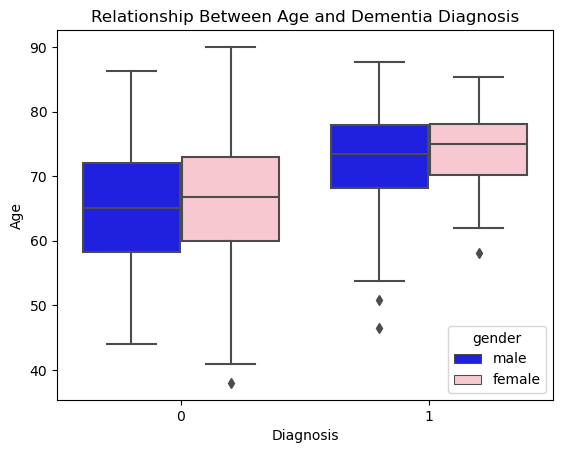

In [13]:
sns.boxplot(data = dementia, x = 'dementia_all', y = 'age', hue = 'gender', palette = ['blue','pink'])
plt.title("Relationship Between Age and Dementia Diagnosis")
plt.xlabel("Diagnosis")
plt.ylabel("Age")

In [15]:
dementia[['dementia_all','age']].corr()

,dementia_all,age
dementia_all,1.000000,0.206106
age,0.206106,1.000000


From this dataset, age is weakly correlated with a dementia diagnosis, so it does not warrant further investigation. This presents as logical seeing that the mean age is 66 years.

## Analysis of Education Level by Dementia Diagnosis:

Text(0, 0.5, 'Educational Level (yrs)')

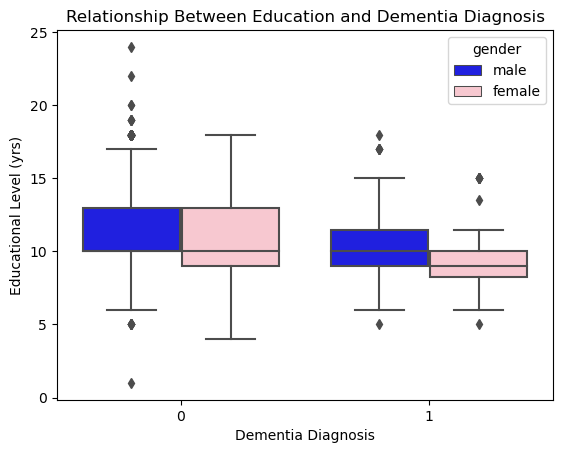

In [18]:
sns.boxplot(data = dementia, x = 'dementia_all', y = 'educationyears', hue = 'gender', palette = ['blue', 'pink'])
plt.title("Relationship Between Education and Dementia Diagnosis")
plt.xlabel("Dementia Diagnosis")
plt.ylabel("Educational Level (yrs)")

In [19]:
dementia[['dementia_all', 'educationyears']].corr()

,dementia_all,educationyears
dementia_all,1.000000,-0.083296
educationyears,-0.083296,1.000000


These two variables are both negatively and weakly correlated, demonstrating that education ultimately has no bearing on the disease's progression and diagnosis.

### Analysis of Diabetes and Education

An aside into a potential future analysis

Text(0, 0.5, 'Educational Level')

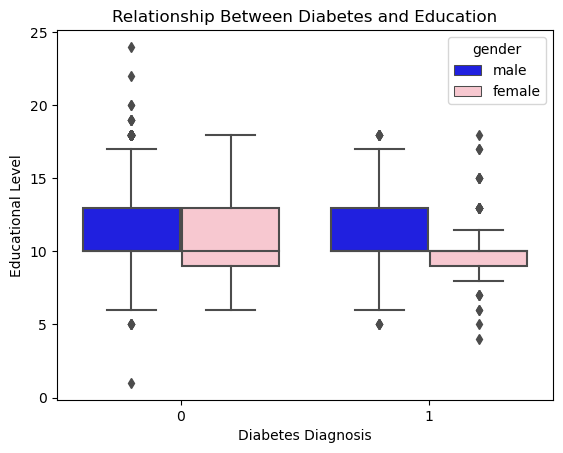

In [21]:
sns.boxplot(data = dementia, x = 'diabetes', y = 'educationyears', hue = 'gender', palette = ['blue', 'pink'])
plt.title("Relationship Between Diabetes and Education")
plt.xlabel("Diabetes Diagnosis")
plt.ylabel("Educational Level")

In [22]:
dementia[['diabetes','educationyears']].corr()

,diabetes,educationyears
diabetes,1.000000,-0.079616
educationyears,-0.079616,1.000000


This proved as futile as the last.

Thus far, the analysis has demonstrated age being the greatest predictor of dementia, and this reflects the fact that it is a neurodegenerative disorder/disease. This entails that as one ages, their risk for dementia increases. The ultimate causation is elusive with several hypotheses into its manifestation, including genetic and epigenetic ones.

## Analysis of Dementia Diagnosis by Fazekas Score

The Fazekas score represents the extent of white matter lesions in the brain.

<Axes: xlabel='dementia_all', ylabel='Fazekas'>

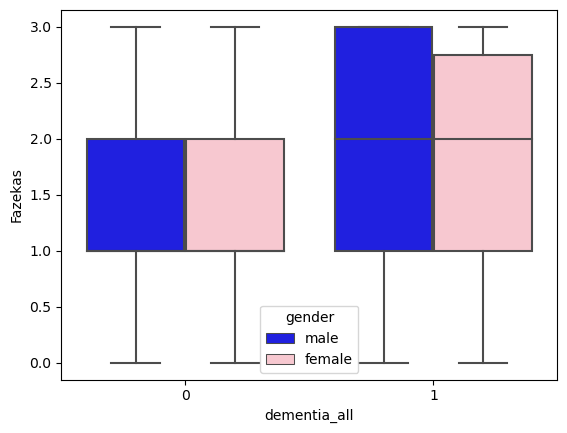

In [26]:
sns.boxplot(data = dementia, x = 'dementia_all', y = 'Fazekas', hue = 'gender', palette = ['blue', 'pink'])

In [25]:
dementia[['dementia_all','Fazekas']].corr()

,dementia_all,Fazekas
dementia_all,1.000000,0.170325
Fazekas,0.170325,1.000000
